# Abstract


This project focuses on solving a classic Natural Language Processing (NLP) problem: Emotion Classification.

The objective is to analyze text data—specifically user-written reviews—and predict the underlying emotion such as joy, sadness, anger, fear, love, or surprise. This is a fundamental NLP task that has applications in customer feedback analysis, mental health monitoring, and chatbot development.

The workflow involves several core components of an NLP pipeline:

1. Loading Data: Importing raw text data using pandas for analysis.

2. Preprocessing: Cleaning and normalizing the text by converting it to lowercase and removing unwanted characters.

3. EDA (Exploratory Data Analysis): Inorder to visualize the distribution of emotions and identify prominent words in each category using word clouds.

4. Vectorization: Transforming textual data into numerical vectors using TF-IDF, which captures word importance in context.

5. Modeling: Training supervised machine learning models like Multinomial Naive Bayes or Support Vector Classifier to learn emotion patterns.

6. Evaluation: Assessing the model’s performance using metrics such as accuracy, precision, recall, F1-score, and a confusion matrix.

This notebook demonstrates a complete NLP pipeline for emotion detection from text using basic machine learning techniques.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix







# Load and Prepare the Data

In [2]:
# Load the data from the text file (adjust the delimiter as needed)
df = pd.read_csv('train.txt', delimiter=";", header=None)

In [3]:
# Print the first few rows to inspect the format
print(df.head())


                                                   0        1
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [4]:
# Check the shape of the dataframe to see how it's structured
print(f"Shape of the dataframe: {df.shape}")

# Check the column names (if there are any)
print(f"Column names: {df.columns}")

Shape of the dataframe: (16000, 2)
Column names: Index([0, 1], dtype='int64')


In [5]:
# Assign proper column names
df.columns = ['review', 'sentiment']

# Check the updated dataframe
print(df.head())

                                              review sentiment
0                            i didnt feel humiliated   sadness
1  i can go from feeling so hopeless to so damned...   sadness
2   im grabbing a minute to post i feel greedy wrong     anger
3  i am ever feeling nostalgic about the fireplac...      love
4                               i am feeling grouchy     anger


In [6]:
# Check the length of the rows
print(f"Number of rows: {len(df)}")

Number of rows: 16000


# Preprocessing

In [7]:
# Text Preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters (optional)
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    
    return text

# Apply preprocessing to reviews
df['review'] = df['review'].apply(preprocess_text)


# EDA (Exploratory Data Analysis)

 Class Distribution: Check how balanced or imbalanced your sentiment/emotion labels are.

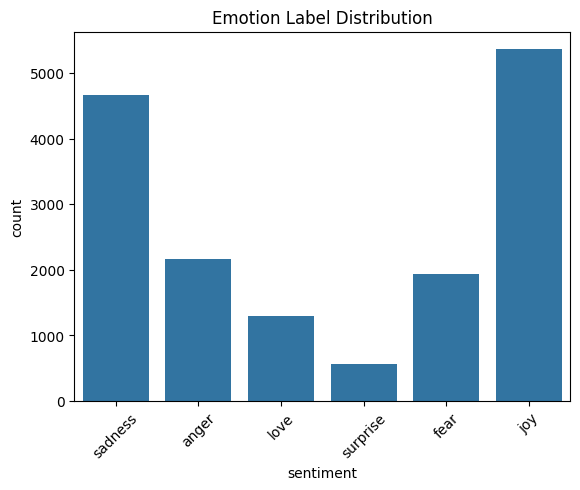

In [8]:
sns.countplot(data=df, x='sentiment')
plt.title("Emotion Label Distribution")
plt.xticks(rotation=45)
plt.show()


Text Length Distribution: Explore how long the reviews are, which can help in later preprocessing or model design.

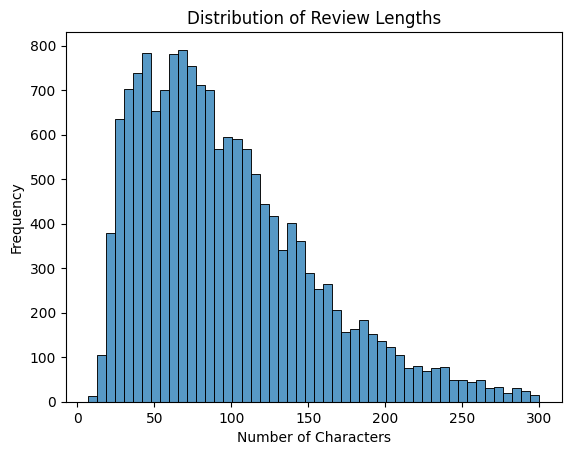

In [9]:
df['text_length'] = df['review'].apply(len)
sns.histplot(df['text_length'], bins=50)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


Most Frequent Words by Emotion: See what words are common in each emotion class.

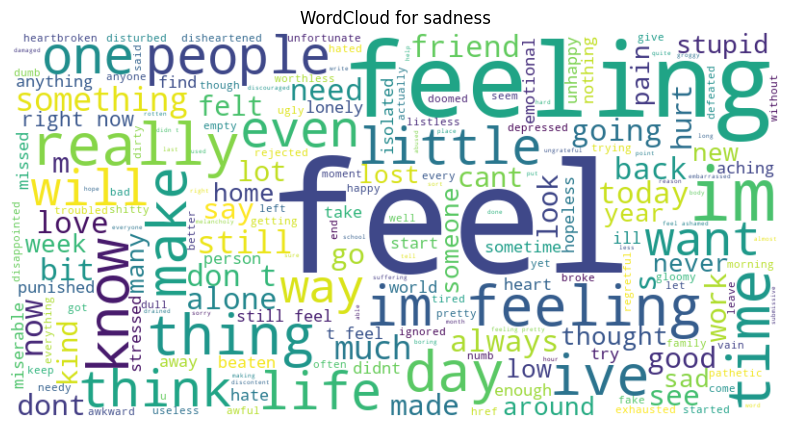

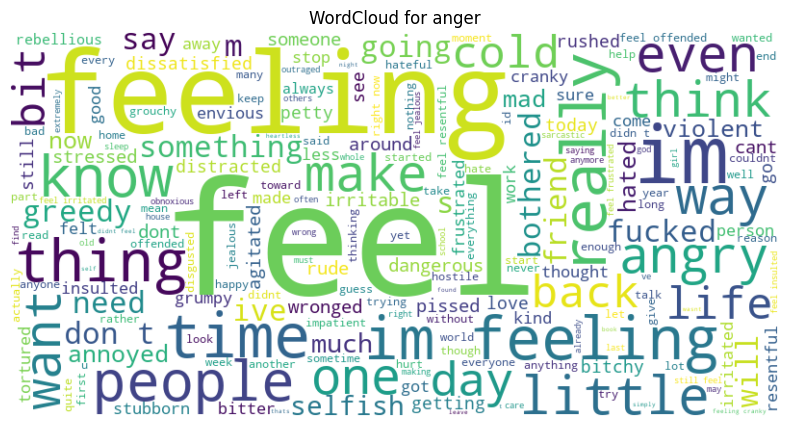

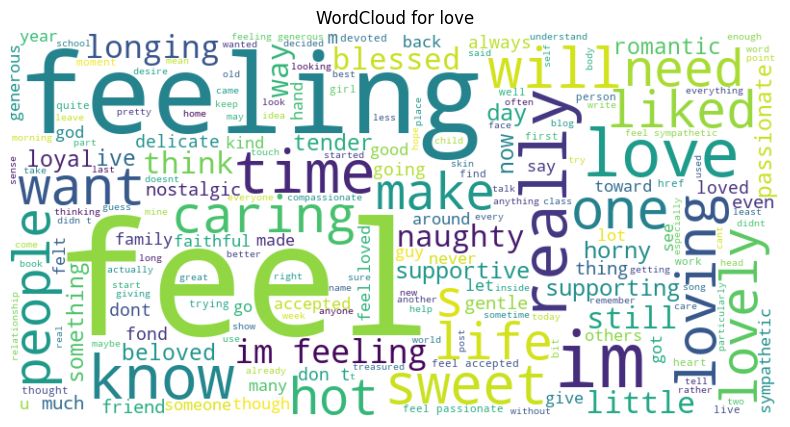

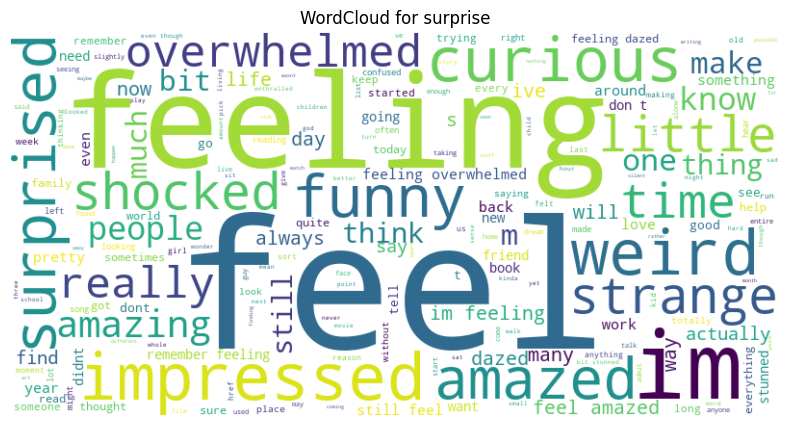

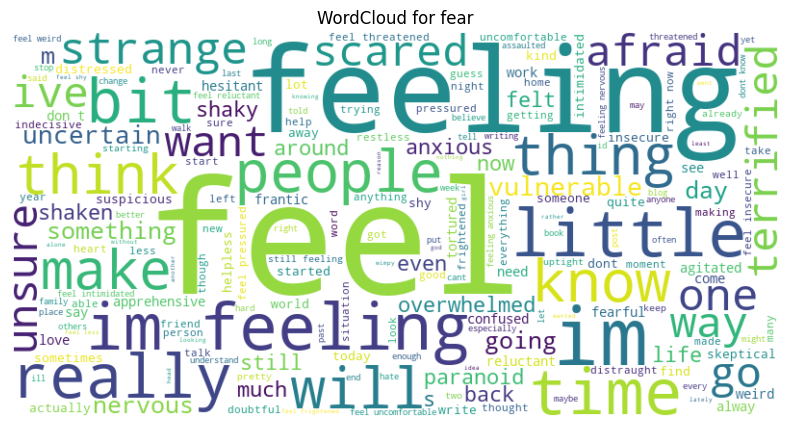

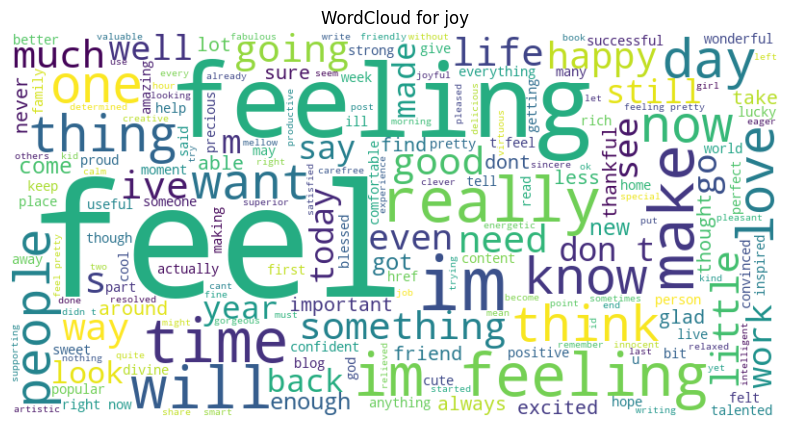

In [10]:
for label in df['sentiment'].unique():
    text = " ".join(df[df['sentiment'] == label]['review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {label}")
    plt.show()


Unique Words / Vocabulary Size

In [11]:
all_words = " ".join(df['review']).split()
unique_words = set(all_words)
print(f"Total words: {len(all_words)}")
print(f"Unique words: {len(unique_words)}")


Total words: 306661
Unique words: 15212


N-gram Analysis : Explore most common bigrams/trigrams.

In [12]:
vectorizer = CountVectorizer(ngram_range=(2,2), max_features=20)
X2 = vectorizer.fit_transform(df['review'])
print("Top 20 Bigrams:")
print(vectorizer.get_feature_names_out())


Top 20 Bigrams:
['am feeling' 'and feel' 'at the' 'feel like' 'feel so' 'feel that'
 'for the' 'going to' 'im feeling' 'in my' 'in the' 'me feel' 'of my'
 'of the' 'on the' 'to be' 'to feel' 'to the' 'want to' 'was feeling']


# Text Vectorization using TF-IDF

Transforms Human Language into Machine-Readable Format.

Captures Word Importance

Enables Pattern Learning

Handles Large Vocabularies Efficiently

Supports Feature Engineering

In [13]:
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['review'])


# Splitting the data into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)


# Model Training 

In [15]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

# Prediction

In [16]:
y_pred = model.predict(X_test)

# Evaluate the model

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 67.41%


# Detailed classification report

In [18]:
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

       anger       0.93      0.37      0.53       427
        fear       0.91      0.26      0.40       397
         joy       0.60      0.98      0.75      1021
        love       1.00      0.06      0.11       296
     sadness       0.71      0.92      0.80       946
    surprise       1.00      0.00      0.00       113

    accuracy                           0.67      3200
   macro avg       0.86      0.43      0.43      3200
weighted avg       0.77      0.67      0.61      3200



# Model Improvements:

Logistic Regression: A good baseline for text classification tasks.

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)


Support Vector Machine (SVM): Can perform well with high-dimensional data.

In [20]:
from sklearn.svm import SVC
model = SVC(kernel='linear')


Random Forest or XGBoost: Ensemble methods that might improve performance by combining multiple models.



In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)


Hyperparameter Tuning:You can fine-tune hyperparameters of your classifier using GridSearchCV or RandomizedSearchCV to find the best set of parameters.

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'alpha': 0.1}


Ensemble Learning: Use techniques like Voting Classifier, Bagging, or Boosting to combine multiple models and potentially increase accuracy.

In [23]:
from sklearn.ensemble import VotingClassifier
model1 = MultinomialNB()
model2 = LogisticRegression()
ensemble_model = VotingClassifier(estimators=[('nb', model1), ('lr', model2)], voting='hard')
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('lr', LogisticRegression())])

Class Imbalance Handling:  Class Weight Adjustment - In algorithms like SVM, Random Forest, and Logistic Regression, you can assign higher weights to underrepresented classes to penalize misclassifications more heavily.

In [24]:
model = SVC(class_weight='balanced')


# Model Evaluation and Analysis:

Confusion Matrix: Display confusion matrices to analyze which classes are getting misclassified.

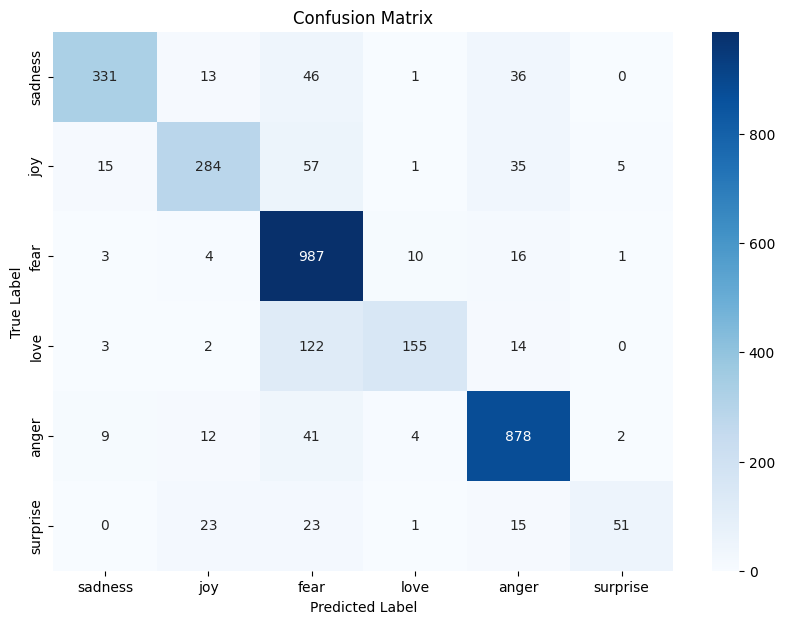

In [25]:
# Fit the model (assuming you already have the data prepared)
model = SVC()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels directly from the data (y_test or y_train)
class_labels = y_test.unique()  # This will give you all unique class labels

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
